# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.2 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Import the FBM HSC, MEMP,  GMP, MPP, CMP, ELP 

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 104652 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                  327
CD8 T                  171
CD14 monocyte         8787
CD56 bright NK         540
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [6]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [7]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'MEMP', 'GMP', 'MPP lymphoid', 'MPP myeloid 1', 
                                             'MPP myeloid 2', 'CMP', 'ELP'])].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP               425
ELP              1358
GMP              1285
HSC                92
MEMP               16
MPP lymphoid       34
MPP myeloid 1      46
MPP myeloid 2      46
dtype: int64

In [9]:
adata.obs["dataset"] = "FBM"

In [10]:
fbm = adata

# Import the fetal liver HSC, MEMP,  GMP, MPP, CMP, ELP 

In [11]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [12]:
adata

AnnData object with n_obs × n_vars = 113063 × 27080 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'cell.labels', 'combined.labels', 'batch', 'sample', 'n_counts', 'cell.labels_progen'
    obsm: 'X_fdg', 'X_tsne', 'X_umap'

In [13]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [14]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [15]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
ELP                        525
GMP                        362
HSC                        242
MEMP                       505
MEP                        639
MPP                       2012
early MK                    81
early erythroid            333
eo/baso/mast precursor      86
erythroid-MPP hybrid        14
macrophage                  81
myeloid DC progenitor       94
pDC progenitor              41
dtype: int64

In [16]:
adata = adata[adata.obs['cell.labels_progen'].isin(['HSC', 'MEMP', 'GMP', 'MPP', 'ELP', 'early erythroid'])].copy()

In [17]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
ELP                 525
GMP                 362
HSC                 242
MEMP                505
MPP                2012
early erythroid     333
dtype: int64

In [18]:
adata.obs["dataset"] = "liver"
adata.obs['cell.labels'] = adata.obs['cell.labels_progen']

In [19]:
liver = adata

# Import the fetal YS HSC, MEMP,  GMP, MPP, CMP, ELP 

In [20]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/ys_total_annotation_20191127.h5ad')

In [21]:
adata

AnnData object with n_obs × n_vars = 10071 × 32084 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'cell.labels', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'LouvainClustering', 'predicted.cell.labels', 'full.ids', 'batch', 'bh_pval', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'n_counts', 'louvain', 'is_doublet', 'is_doublet_poptrim', 'res.30', 'backlabeled_1', 'cell.labels_progen'

In [22]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
CMP                    55
ELP                   174
GMP                    40
HSC                   105
MEMP                   55
MEP                    56
Monocyte precursor     26
macrophage             42
neut myeloid           18
dtype: int64

In [23]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [24]:
adata = adata[adata.obs['cell.labels_progen'].isin(['HSC', 'neut myeloid', 'MEMP', 'GMP', 'CMP', 'ELP'])].copy()

In [25]:
cell_numbers = adata.obs.groupby(["cell.labels_progen"]).apply(len)
cell_numbers

cell.labels_progen
CMP              55
ELP             174
GMP              40
HSC             105
MEMP             55
neut myeloid     18
dtype: int64

In [26]:
adata.obs["dataset"] = "ys"
adata.obs['cell.labels'] = adata.obs['cell.labels_progen']

In [27]:
ys = adata

# Import the ABM HSC, MEMP,  GMP, MPP, CMP, ELP 

In [28]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/adult_bm/data/adult_bm_raw_dr_20200311.h5ad')

In [29]:
adata

AnnData object with n_obs × n_vars = 142026 × 33694 
    obs: 'sample', 'lanes', 'sex', 'age', 'ethnicity', 'mad_prd', 'auto_prd', 'cell.labels', 'cell.labels2', 'leiden', 'percent.mito', 'nGene', 'nUMI'
    var: 'gene_ids'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [30]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD14 monocyte                   3094
CD16 monocyte                   1938
CD56 bright NK                  1228
CMP                              882
DC1                              135
DC2                              481
DC3                              550
EI macrophage                     77
ELP-B cell                        80
ELP-pDC                           63
GMP                              398
HSC                              862
MEMP                             505
MK                               577
MK progenitor                    280
MSC                              161
Pre B cell                       971
T reg                           6327
early MK                         136
early erythroid                 5441
immature B cell                 2728
interferon induced monocyte      576
late erythroid                  1150
mature CD8 T cell              15725
mature NK                       6074
memory B cell                   4106
memory CD4 T cell         

In [31]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [32]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'transitional DC ', 'MEMP', 'GMP', 'CMP', 'ELP-B cell', 'ELP-pDC'])].copy()

In [33]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                 882
ELP-B cell           80
ELP-pDC              63
GMP                 398
HSC                 862
MEMP                505
transitional DC      75
dtype: int64

In [34]:
adata.obs["dataset"] = "ABM"

In [35]:
abm = adata

# Import the CB HSC, MEMP,  GMP, MPP, CMP, ELP 

In [36]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/cord_blood/data/cord_blood_raw_dr_20200311.h5ad')

In [37]:
adata

AnnData object with n_obs × n_vars = 148442 × 33694 
    obs: 'sample', 'lanes', 'mad_prd', 'auto_prd', 'cell.labels', 'cell.labels2', 'leiden', 'percent.mito', 'nGene', 'nUMI'
    var: 'gene_ids'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [38]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD8 T cell          16345
CD14 monocyte       13324
CD16 monocyte         888
CD56 bright NK       4066
CMP                   272
DC1                    67
DC2                   155
DC precursor          169
GMP                   203
HSC                   194
ILC precursor        1519
MEMP                  338
MK                   1262
early MK              496
early erythroid       532
late erythroid        878
mature NK            7860
mid erythroid        2627
myelocyte            3726
naive B cell        19516
naive CD4 T cell    69338
neutrophil           3458
pDC                   242
preDC                 269
premonocyte           607
tDC                    91
dtype: int64

In [39]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [40]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'tDC', 'MEMP', 'GMP', 'CMP', 'mid erythroid'])].copy()

In [41]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP               272
GMP               203
HSC               194
MEMP              338
mid erythroid    2627
tDC                91
dtype: int64

In [42]:
adata.obs["dataset"] = "CB"

In [43]:
cb = adata

# Combine the datasets

In [44]:
from scipy import sparse

objects = [ys, liver, fbm, abm, cb]

for i in objects:
    array_vals = i.X
    i.X = sparse.csr_matrix(i.X)
    i.raw = i
    i.X = array_vals

In [45]:
merged = ys.concatenate(liver, fbm, abm, cb, index_unique=None, join='inner')

In [46]:
merged.shape

(14318, 27061)

In [47]:
cell_numbers = merged.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                 1634
ELP                 2057
ELP-B cell            80
ELP-pDC               63
GMP                 2288
HSC                 1495
MEMP                1419
MPP                 2012
MPP lymphoid          34
MPP myeloid 1         46
MPP myeloid 2         46
early erythroid      333
mid erythroid       2627
neut myeloid          18
tDC                   91
transitional DC       75
dtype: int64

In [48]:
merged.obs["dataset_cell.labels"] = merged.obs["dataset"].astype(str) + '_' + merged.obs["cell.labels"].astype(str)

In [49]:
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
ABM_CMP                   882
ABM_ELP-B cell             80
ABM_ELP-pDC                63
ABM_GMP                   398
ABM_HSC                   862
ABM_MEMP                  505
ABM_transitional DC        75
CB_CMP                    272
CB_GMP                    203
CB_HSC                    194
CB_MEMP                   338
CB_mid erythroid         2627
CB_tDC                     91
FBM_CMP                   425
FBM_ELP                  1358
FBM_GMP                  1285
FBM_HSC                    92
FBM_MEMP                   16
FBM_MPP lymphoid           34
FBM_MPP myeloid 1          46
FBM_MPP myeloid 2          46
liver_ELP                 525
liver_GMP                 362
liver_HSC                 242
liver_MEMP                505
liver_MPP                2012
liver_early erythroid     333
ys_CMP                     55
ys_ELP                    174
ys_GMP                     40
ys_HSC                    105
ys_MEMP                    55
ys_neut myeloid     

# Pre-process the data

In [50]:
adata=merged

In [51]:
# normalise count data 
sc.pp.normalize_total(adata)

In [52]:
# log the count data 
sc.pp.log1p(adata)

In [53]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [54]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run MKI67 dotplot

In [55]:
adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].replace(['FBM_MPP lymphoid', 'FBM_MPP myeloid 1', 
                                            'FBM_MPP myeloid 2', 'ABM_ELP-B cell', 'ABM_ELP-pDC'], ['FBM_MPP', 
                                            'FBM_MPP', 'FBM_MPP', 'ABM_ELP', 'ABM_ELP'])

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype('category')

adata.obs["dataset_cell.labels"].cat.categories

Index(['ABM_CMP', 'ABM_ELP', 'ABM_GMP', 'ABM_HSC', 'ABM_MEMP',
       'ABM_transitional DC ', 'CB_CMP', 'CB_GMP', 'CB_HSC', 'CB_MEMP',
       'CB_mid erythroid', 'CB_tDC', 'FBM_CMP', 'FBM_ELP', 'FBM_GMP',
       'FBM_HSC', 'FBM_MEMP', 'FBM_MPP', 'liver_ELP', 'liver_GMP', 'liver_HSC',
       'liver_MEMP', 'liver_MPP', 'liver_early erythroid', 'ys_CMP', 'ys_ELP',
       'ys_GMP', 'ys_HSC', 'ys_MEMP', 'ys_neut myeloid'],
      dtype='object')

In [56]:
new_order = ['ys_HSC', 'ys_neut myeloid', 'ys_CMP', 'ys_GMP', 'ys_MEMP', 'ys_ELP', 
             'liver_HSC', 'liver_MPP', 'liver_early erythroid', 'liver_GMP', 'liver_MEMP', 'liver_ELP',  
             'FBM_HSC',  'FBM_MPP', 'FBM_CMP', 'FBM_GMP', 'FBM_MEMP', 'FBM_ELP', 
             'CB_HSC', 'CB_tDC', 'CB_CMP', 'CB_GMP', 'CB_MEMP', 'CB_mid erythroid', 
             'ABM_HSC', 'ABM_transitional DC ', 'ABM_CMP', 'ABM_GMP', 'ABM_MEMP', 'ABM_ELP']

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories(new_order)

... storing 'AnnatomicalPart' as categorical
... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'backlabeled_1' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels2' as categorical
... storing 'cell.labels_progen' as categorical
... storing 'combined.labels' as categorical
... storing 'dataset' as categorical
... storing 'doublets' as categorical
... storing 'ethnicity' as categorical
... storing 'fetal.ids' as categorical
... storing 'full.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'leiden' as categorical
... storing 'mad_prd' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sample' as categorical
... storing 'sample.type' a

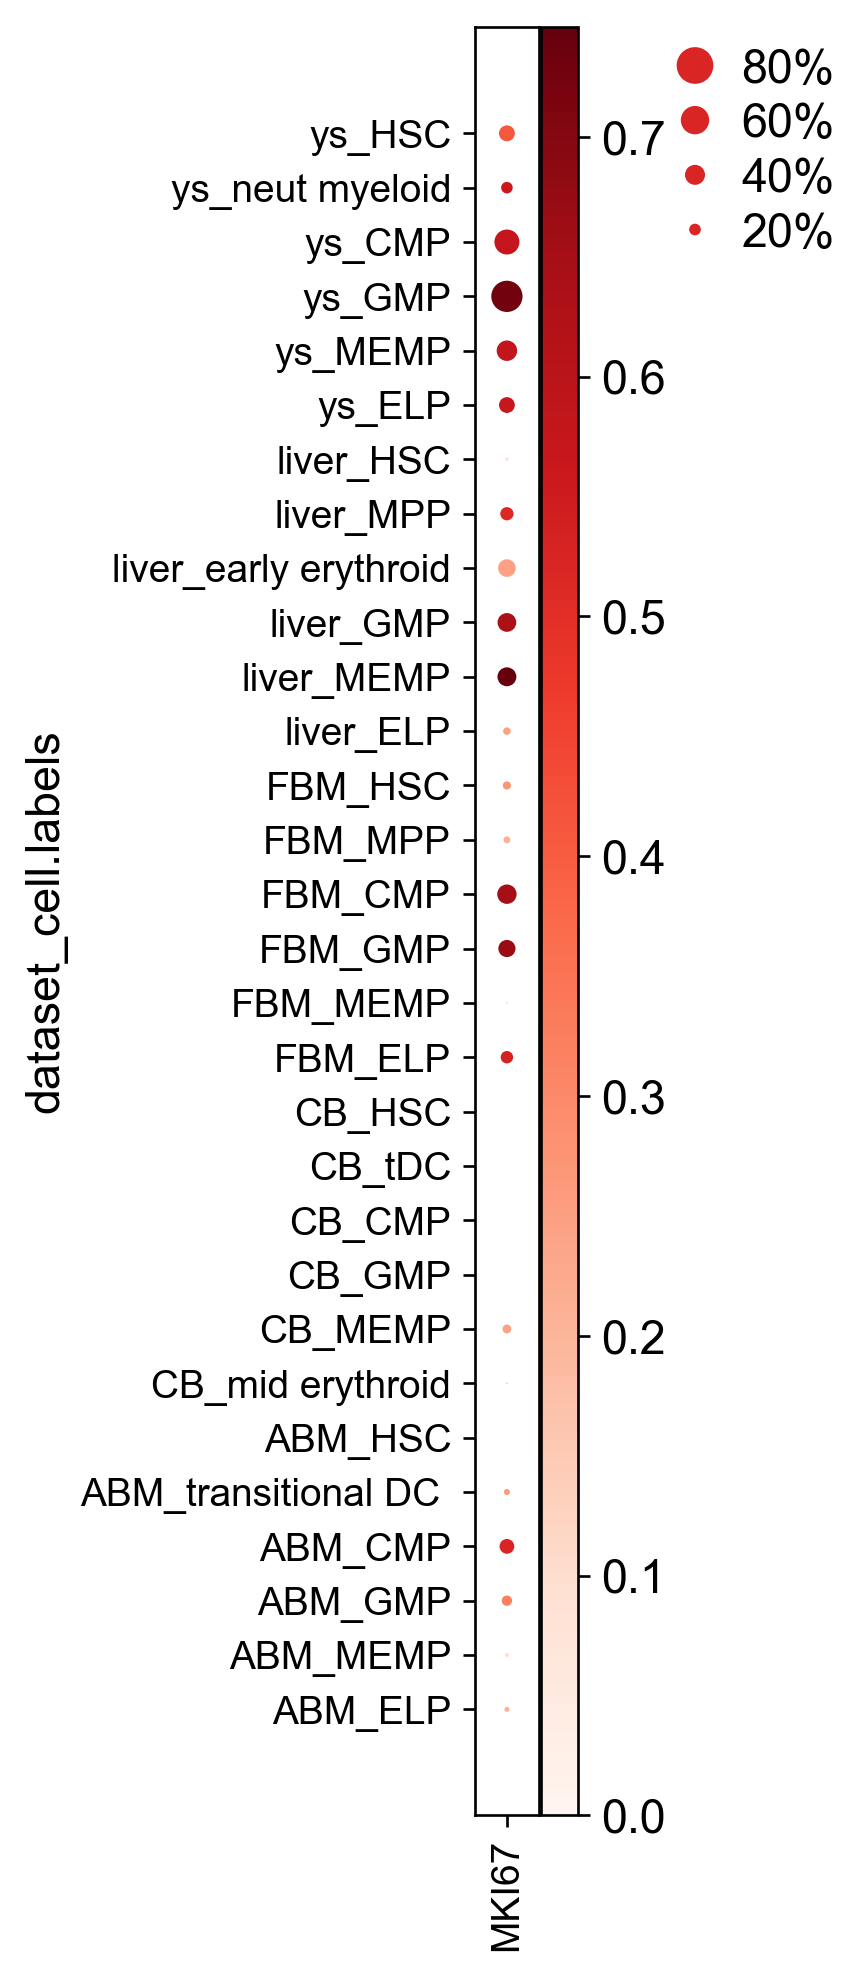

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [57]:
sc.settings.set_figure_params(dpi=120, dpi_save=1200)
sc.pl.dotplot(adata, var_names=["MKI67"], groupby="dataset_cell.labels",
              use_raw=False, save="fig5c_progen_crosstissue_mki67_dotplot_20200520.pdf")

# Save the data

In [58]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [59]:
adata.X

<14318x27061 sparse matrix of type '<class 'numpy.float32'>'
	with 35236911 stored elements in Compressed Sparse Row format>

In [60]:
adata.raw.X

<14318x27061 sparse matrix of type '<class 'numpy.float32'>'
	with 37948291 stored elements in Compressed Sparse Row format>

In [61]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig5c_progen_cross_tissue_20200520.h5ad")